In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv
Saving bank-full.csv to bank-full.csv
Saving bank-names.txt to bank-names.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving .Rhistory to .Rhistory
Saving bank-additional.csv to bank-additional.csv
Saving bank-additional-full.csv to bank-additional-full.csv
Saving bank-additional-names.txt to bank-additional-names.txt
Saving .DS_Store to .DS_Store


In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [ ]:
df.drop(columns=['duration'], inplace=True)

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns='y')
y = df['y']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8970623937848993

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238

📉 Confusion Matrix:
 [[7148  155]
 [ 693  242]]


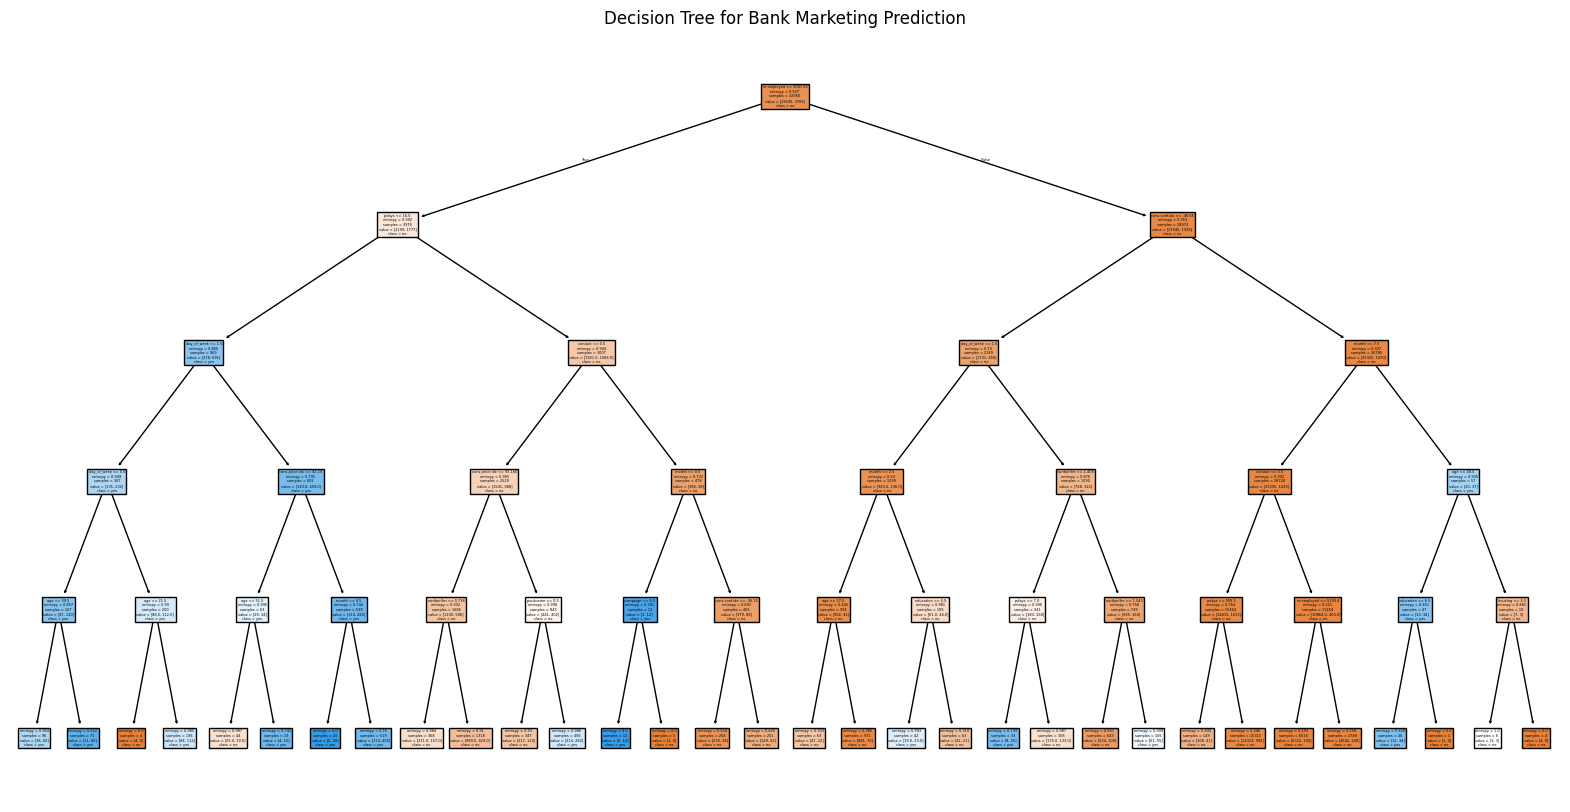

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree for Bank Marketing Prediction")
plt.show()

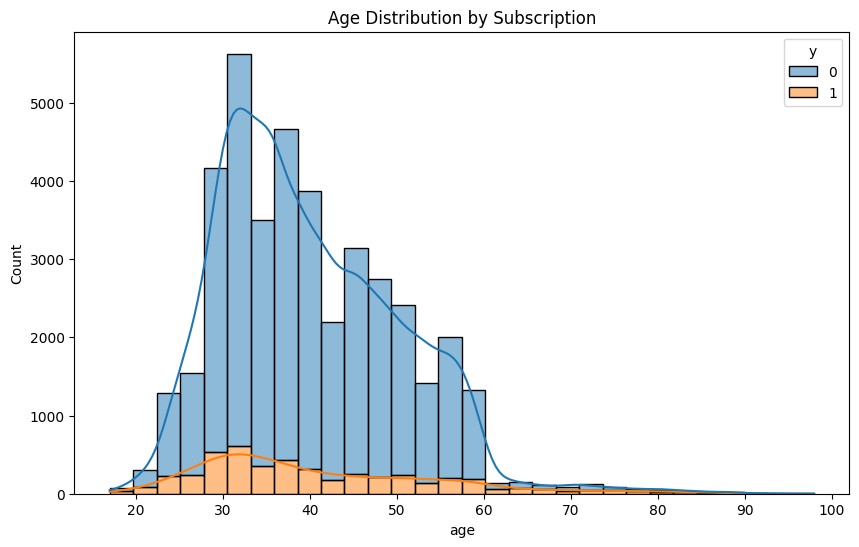

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, multiple='stack')
plt.title("Age Distribution by Subscription")
plt.show()


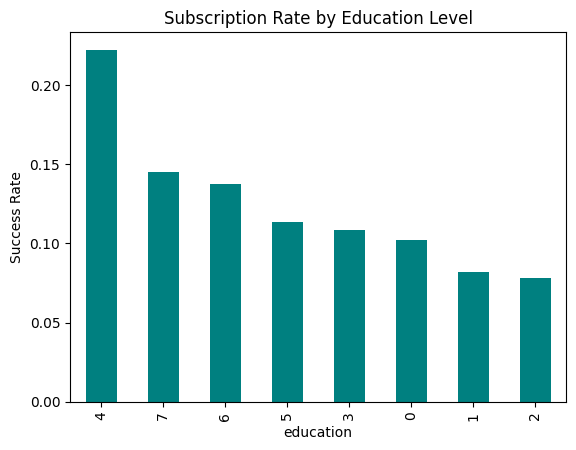

In [ ]:
education_success = df.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)[1]
education_success.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Subscription Rate by Education Level")
plt.ylabel("Success Rate")
plt.show()